In [67]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
# Load Dataset
fc_df = pd.read_csv('fulfilment_center_info.csv')
meal_df = pd.read_csv('meal_info.csv')
submission_df = pd.read_csv('sample_submission.csv')
train_df = pd.read_csv('train.csv')

In [69]:
fc_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [70]:
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [71]:
submission_df.head()

#dataframe tidak digunakan lebih lanjut karena isi kolom num_orders semuanya 0

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [72]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [73]:
# merge dataset for EDA
df = train_df.merge(meal_df, on='meal_id').merge(fc_df, on='center_id')
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


DATA UNDERSTANDING  
id : Unique ID  
week : Week no  
center_id : Unique ID for fulfillment center  
meal_id : Unique ID for Meal  
checkout_price : Final price including discount, taxes & delivery charges  
base_price : Base price of the meal  
emailer_for_promotion : Emailer sent for promotion of meal  
homepage_featured : Meal featured at homepage  
num_orders : Orders Count (Target)  
category : Type of meal (beverages/snacks/soup/...)  
cuisine : Meal cuisine (Indian/Italian/…)  
city_code : Unique code for city  
region_code : Unique code for region  
center_type : Anonymized center type  
op_area : Area of operation (in km^2)



# Explanatory Data Analysis (EDA)

In [74]:
df.info() #no null data, namun beberapa data terlihat numerik padahal interpretasinya adalah sebagai object (non-numerik)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [75]:
df = df.astype({'week':object, 'center_id':object, 'meal_id':object, 'num_orders':int, 'city_code':object, 'region_code':object, 'emailer_for_promotion':object, 'homepage_featured':object})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  object 
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  object 
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  object 
 7   homepage_featured      456548 non-null  object 
 8   num_orders             456548 non-null  int32  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  object 
 12  region_code            456548 non-null  object 
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [76]:
# Describing numerical data
df.drop(columns='id').describe()

,checkout_price,base_price,num_orders,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000
mean,332.238933,354.156627,261.872760,4.083590
std,152.939723,160.715914,395.922798,1.091686
min,2.970000,55.350000,13.000000,0.900000
25%,228.950000,243.500000,54.000000,3.600000
50%,296.820000,310.460000,136.000000,4.000000
75%,445.230000,458.870000,324.000000,4.500000
max,866.270000,866.270000,24299.000000,7.000000


In [77]:
# Describing non numerical data
df.describe(include=object)

,week,center_id,meal_id,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
count,456548,456548,456548,456548,456548,456548,456548,456548,456548,456548
unique,145,77,51,2,2,14,4,51,8,3
top,122,13,2290,0,0,Beverages,Italian,590,56,TYPE_A
freq,3359,7046,11138,419498,406693,127890,122925,54746,191228,262881


- Rata-rata checkout price < rata-rata base price, kita bisa asumsikan customer aware dan paham penggunaan voucher discount. Metode ini dapat dipertimbangkan untuk upselling pada periode-periode tertentu
- Top selling product adalah beverages dan Italian cuisine
- City code 590 dan region code 56 merupakan area yang potensial untuk pengadaan event-event marketing karena memiliki penjualan yang tertinggi
- Emailer for promotion dan homepage featured dapat diasumsikan tidak memiliki efek signifikan, karena sebagian besar menu yang dipesan tidak terdapat pada email promosi maupun homepage
- Center type A merupakan center yang tersibuk dibandingkan center type B dan C. Hal ini bisa digunakan sebagai landasan untuk melakukan pembangunan fasilitas di center type A agar dapat megakomodir lebih banyak pesanan.

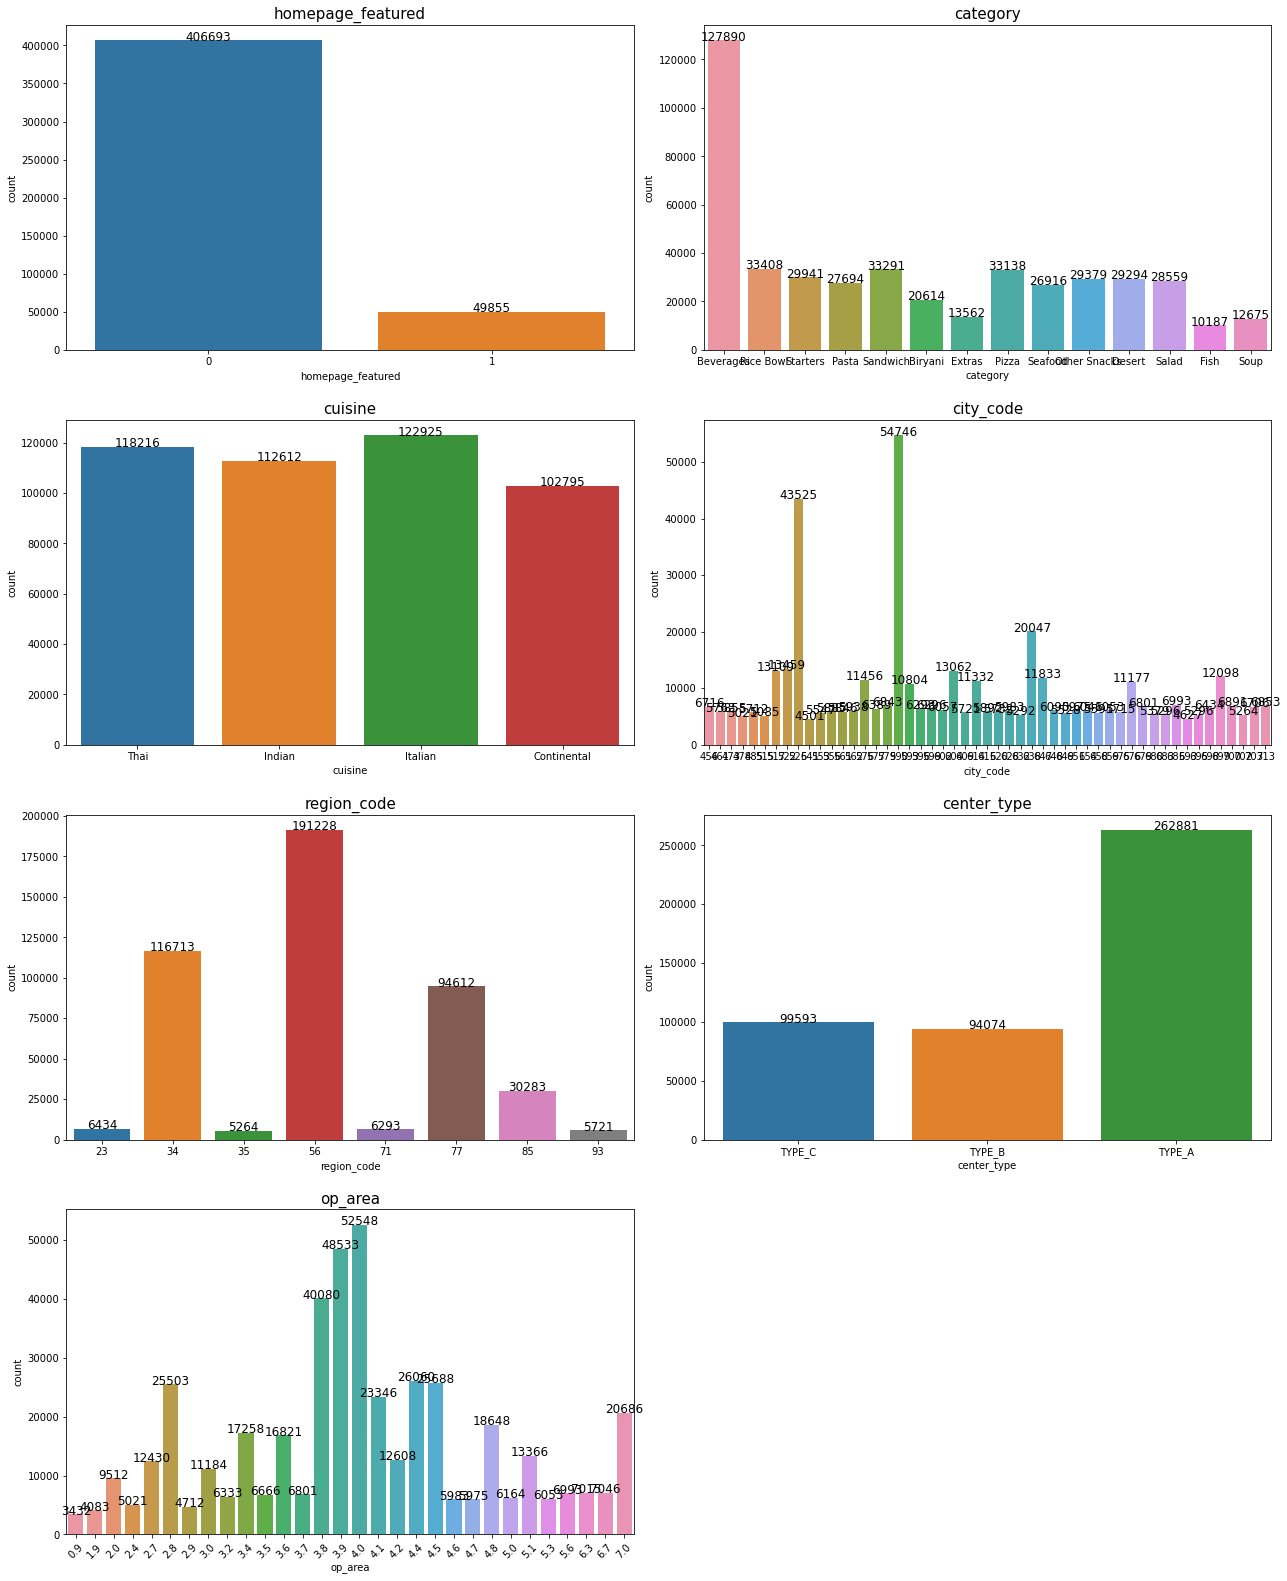

In [78]:
# Visualize data values
plt.figure(figsize=(18,27))
column_list = [
 'center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area'] [3:12]
A = 0
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data=df, x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >= 7:
        plt.xticks(rotation=45)
plt.tight_layout(h_pad=2)

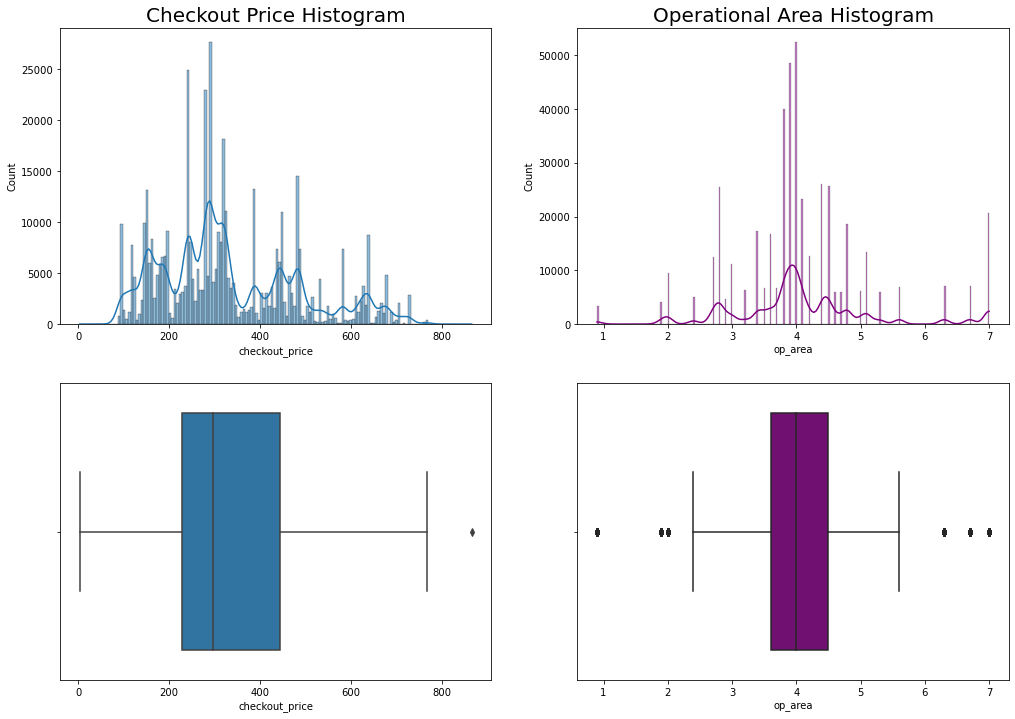

In [79]:
# Distribution of numerical data
plt.figure(figsize=(17,12))


plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['checkout_price'],kde=True)
plt.title('Checkout Price Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(df['op_area'],kde=True,color="purple")
plt.title('Operational Area Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(df['checkout_price'])

plt.subplot(224)
sns.boxplot(df['op_area'],color="purple")

plt.show()

In [80]:
# Distribution normality test
numerical_feature = ['checkout_price', 'base_price', 'op_area']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

checkout_price : Not normal distribution
base_price : Not normal distribution
op_area : Not normal distribution


- Distribusi data-data numerik tidak mengikuti distribusi normal

# Forecasting

In [81]:
df_total_order = df[['week','num_orders']].groupby('week').sum().reset_index()
df_total_order.index = df_total_order.index + 1
df_total_order

,week,num_orders
1,1,792261
2,2,787084
3,3,695262
4,4,743529
5,5,1198675
...,...,...
141,141,776240
142,142,739661
143,143,759926
144,144,801197


# Data splitting

In [82]:
len(df_total_order) - len(df_total_order)*0.2

116.0

In [83]:
train = df_total_order[:116]
test = df_total_order[116:]

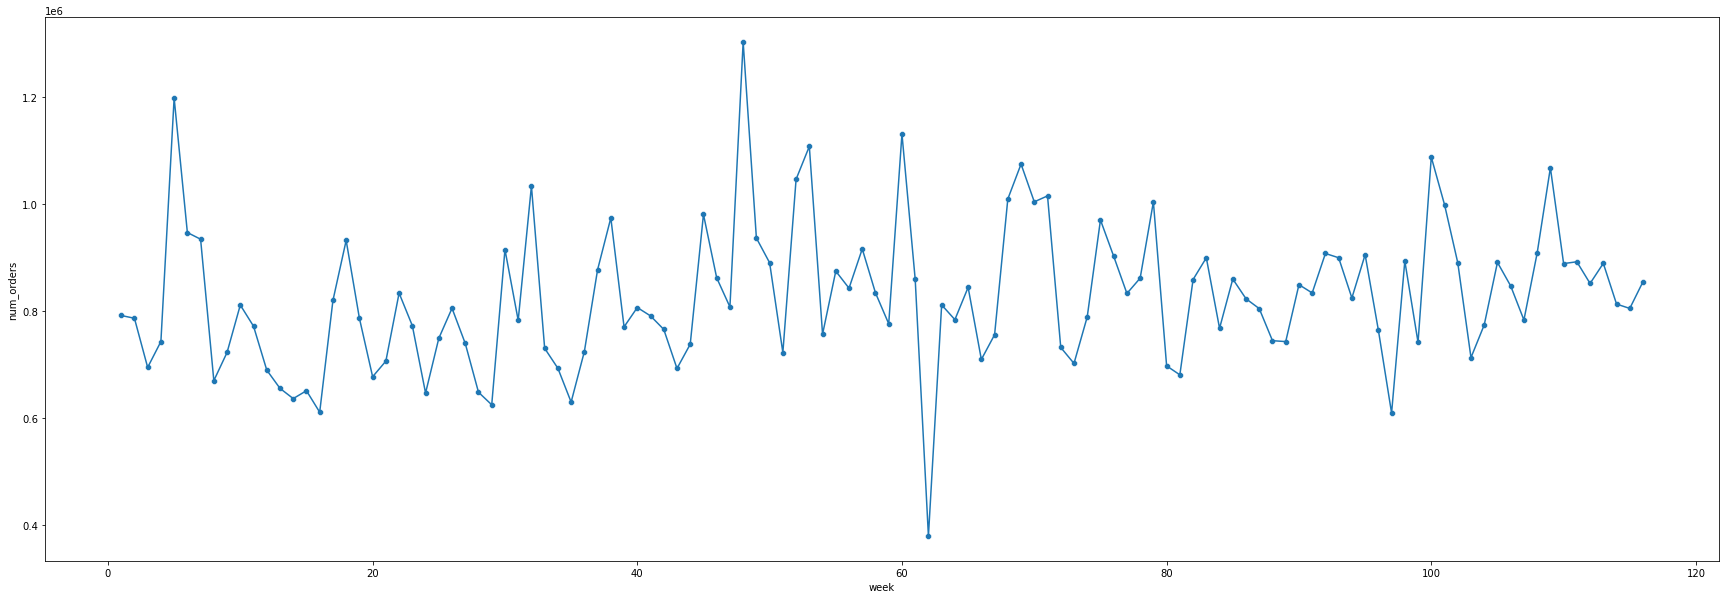

In [84]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='week', y='num_orders', data=train)
sns.lineplot(x='week', y='num_orders', data=train)
plt.xticks()
plt.show()

Secara umum terlihat bahwa data num orders tidak memiliki tren tertentu (random pattern) dan stasioner, namun kita coba dahulu untuk memastikan stationarity-nya

In [85]:
# Uji Stationarity dengan ADF
from statsmodels.tsa.stattools import adfuller

In [86]:
adfuller(train['num_orders']) #P-value > 0.05 sehingga data tidak stasioner.

(-2.248366651521431,
 0.1891615125215923,
 9,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 2689.2722497208824)

In [87]:
# Differencing
df_total_order_stationare = train.copy()
df_total_order_stationare['Stationare 1'] = df_total_order_stationare['num_orders'].diff(1)
df_total_order_stationare['Stationare 2'] = df_total_order_stationare['num_orders'].diff(2)
df_total_order_stationare

,week,num_orders,Stationare 1,Stationare 2
1,1,792261,NaN,NaN
2,2,787084,-5177.0,NaN
3,3,695262,-91822.0,-96999.0
4,4,743529,48267.0,-43555.0
5,5,1198675,455146.0,503413.0
...,...,...,...,...
112,112,852107,-40524.0,-37148.0
113,113,889696,37589.0,-2935.0
114,114,813601,-76095.0,-38506.0
115,115,805469,-8132.0,-84227.0


In [88]:
adfuller(df_total_order_stationare['Stationare 1'].dropna()) #P-Value < 0.05 sehingga data stasioner

(-5.8794607739577085,
 3.1030004434256794e-07,
 8,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 2665.384963373407)

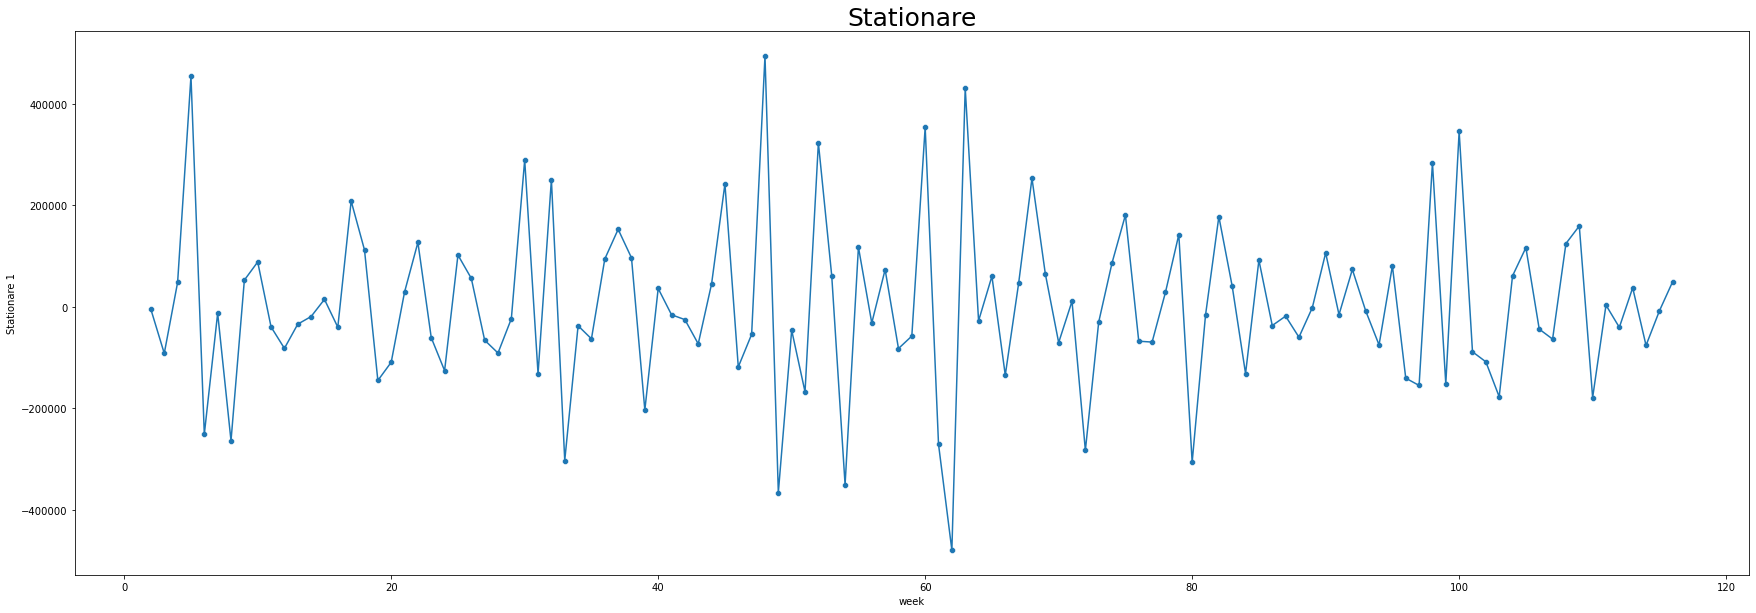

In [89]:
plt.figure(figsize=(30,10))
sns.scatterplot(x='week', y='Stationare 1', data=df_total_order_stationare)
sns.lineplot(x='week', y='Stationare 1', data=df_total_order_stationare)
plt.xticks()
plt.title('Stationare', size=25)
plt.show() #terlihat plotting stationare dengan differencing 1

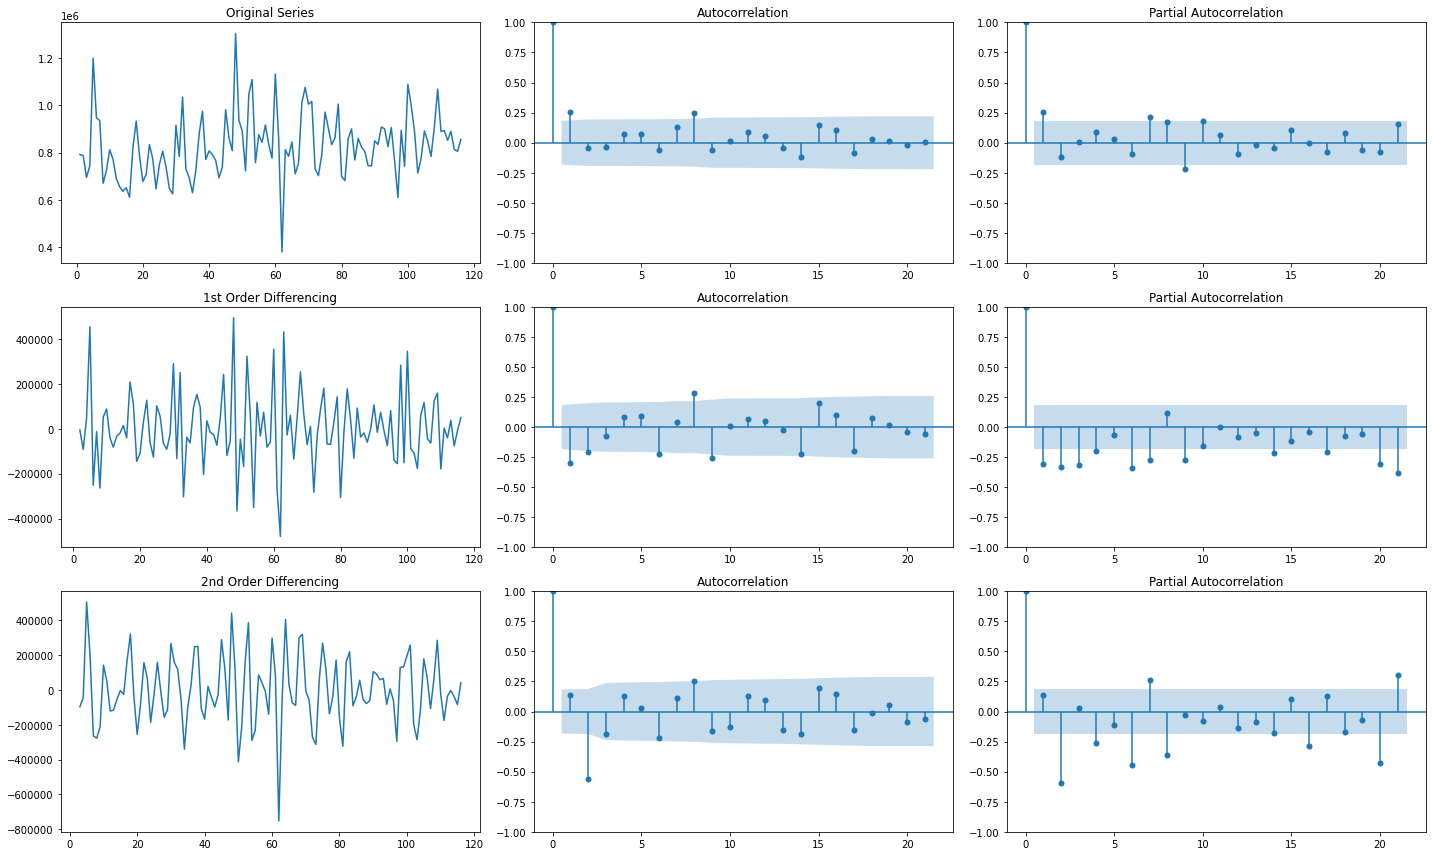

In [90]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(train['num_orders']); axes[0, 0].set_title('Original Series')
plot_acf(train['num_orders'], ax=axes[0, 1])
plot_pacf(train['num_orders'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(train['num_orders'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train['num_orders'].diff().dropna(), ax=axes[1, 1])
plot_pacf(train['num_orders'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(train['num_orders'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train['num_orders'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(train['num_orders'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

- 1st order differencing cukup untuk mencapai stationarity
- Dari pengamatan ACF PACF, kita bisa mencoba model ARIMA (2,1,0) dan (0,1,2), namun untuk menentukan (p,d,q) akan digunakan metode auto arima

# Modeling

In [91]:
import pmdarima as pm
from pmdarima import auto_arima

In [92]:
auto_arima(train['num_orders'], m=12, information_criterion='aicc', trace=True, suppress_warnings=True, random_state=123)

Performing stepwise search to minimize aicc
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AICC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AICC=3092.841, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AICC=3087.618, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AICC=3064.818, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AICC=3090.775, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AICC=3062.861, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AICC=3064.937, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AICC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AICC=3057.675, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AICC=3059.781, Time=0.19 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AICC=3059.503, Time=0.15 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AICC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AICC=3085.810, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AICC=3057.552, Time=0.12 sec
 ARIMA(2,1,1)(1,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [93]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [94]:
model = ARIMA(train['num_orders'], order=(0,1,2)) 
model_fit = model.fit()

In [95]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             num_orders   No. Observations:                  116
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1524.280
Date:                Fri, 07 Jan 2022   AIC                           3054.559
Time:                        19:39:46   BIC                           3062.794
Sample:                             0   HQIC                          3057.902
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6374      0.093     -6.878      0.000      -0.819      -0.456
ma.L2         -0.2894      0.080     -3.595      0.000      -0.447      -0.132
sigma2      1.825e+10   1.75e-12   1.04e+22      0.000    1.83e+10    1.83e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.74
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.62e+37. Standard errors may be unstable.
"""

In [96]:
forecast_length = len(test)
forecast_result = model_fit.forecast(forecast_length)
forecast_result

117    858339.124643
118    855112.326047
119    855112.326047
120    855112.326047
121    855112.326047
122    855112.326047
123    855112.326047
124    855112.326047
125    855112.326047
126    855112.326047
127    855112.326047
128    855112.326047
129    855112.326047
130    855112.326047
131    855112.326047
132    855112.326047
133    855112.326047
134    855112.326047
135    855112.326047
136    855112.326047
137    855112.326047
138    855112.326047
139    855112.326047
140    855112.326047
141    855112.326047
142    855112.326047
143    855112.326047
144    855112.326047
145    855112.326047
Name: predicted_mean, dtype: float64

In [97]:
last_week = len(train)
week = []
for i in range(1, forecast_length+1):
    week.append(last_week + i)

In [98]:
pred = pd.DataFrame({
    'week': week,
    'num_orders': forecast_result
})

In [99]:
train_result = train[-1:].append(pred)

In [100]:
yhat_conf_int = model_fit.get_forecast(forecast_length).conf_int(alpha=0.05)

In [101]:
train_result_f = pd.DataFrame({
    'week': week,
    'forecast': forecast_result,
    'upper': yhat_conf_int['lower num_orders'],
    'lower': yhat_conf_int['upper num_orders']
})
train_result_f

,week,forecast,upper,lower
117,117,858339.124643,593543.681555,1.123135e+06
118,118,855112.326047,573445.475154,1.136779e+06
119,119,855112.326047,572778.817545,1.137446e+06
120,120,855112.326047,572113.730372,1.138111e+06
121,121,855112.326047,571450.202588,1.138774e+06
122,122,855112.326047,570788.223276,1.139436e+06
123,123,855112.326047,570127.781646,1.140097e+06
124,124,855112.326047,569468.867031,1.140756e+06
125,125,855112.326047,568811.468889,1.141413e+06
126,126,855112.326047,568155.576796,1.142069e+06


In [102]:
import plotly.graph_objects as go

In [103]:
# Visualisasi
fig = go.Figure(go.Scatter(name = 'train',x=train['week'], y=train['num_orders']))
fig.add_trace(go.Scatter(name = 'test',x=test['week'], y=test['num_orders']))
fig.add_trace(go.Scatter(name = 'forecast',x=train_result['week'], y=train_result['num_orders']))
fig.add_trace(go.Scatter(name = 'lower bound',x=train_result_f['week'], y=train_result_f['lower']))
fig.add_trace(go.Scatter(name = 'upper bound',x=train_result_f['week'], y=train_result_f['upper']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

plotly image:
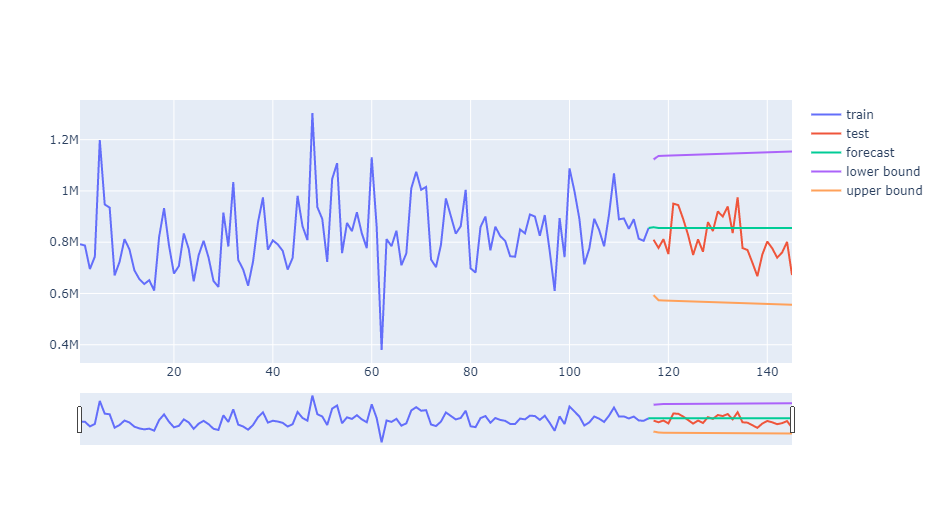

# Model evaluation

In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
np.sqrt(mean_squared_error(test, pred))

63687.517671011905

In [106]:
test['num_orders'].mean(), np.sqrt(test['num_orders'].var())

(814443.5172413794, 81719.29681696129)

Dari grafik terlihat bahwa model yang dihasilkan hanya mampu mengcapture trend data predicted mean (tidak dapat melakukan prediksi values secara akurat)  
_(author masih perlu belajar lebih dalam tentang bias yang terjadi pada proses forecasting ini)_

# Predict future data

In [107]:
final_model = ARIMA(df_total_order['num_orders'], order=(0,1,2)) 
final_model_fit = model.fit()

In [108]:
final_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             num_orders   No. Observations:                  116
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1524.280
Date:                Fri, 07 Jan 2022   AIC                           3054.559
Time:                        19:39:46   BIC                           3062.794
Sample:                             0   HQIC                          3057.902
                                - 116                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6374      0.093     -6.878      0.000      -0.819      -0.456
ma.L2         -0.2894      0.080     -3.595      0.000      -0.447      -0.132
sigma2      1.825e+10   1.75e-12   1.04e+22      0.000    1.83e+10    1.83e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.74
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.62e+37. Standard errors may be unstable.
"""

In [109]:
forecast_length = 6 #prediksi 6 periode selanjutnya (satuan minggu)
forecast_result = model_fit.forecast(forecast_length)
forecast_result

117    858339.124643
118    855112.326047
119    855112.326047
120    855112.326047
121    855112.326047
122    855112.326047
Name: predicted_mean, dtype: float64

In [110]:
last_week = len(df_total_order)
week = []
for i in range(1, forecast_length+1):
    week.append(last_week + i)

In [111]:
pred = pd.DataFrame({
    'week': week,
    'num_orders': forecast_result
})
pred

,week,num_orders
117,146,858339.124643
118,147,855112.326047
119,148,855112.326047
120,149,855112.326047
121,150,855112.326047
122,151,855112.326047


In [112]:
final_result = df_total_order[-1:].append(pred)
yhat_conf_int = model_fit.get_forecast(forecast_length).conf_int(alpha=0.05)
final_result

,week,num_orders
145,145,671926.000000
117,146,858339.124643
118,147,855112.326047
119,148,855112.326047
120,149,855112.326047
121,150,855112.326047
122,151,855112.326047


In [113]:
final_result_f = pd.DataFrame({
    'week': week,
    'forecast': forecast_result,
    'upper': yhat_conf_int['lower num_orders'],
    'lower': yhat_conf_int['upper num_orders']
})
final_result_f

,week,forecast,upper,lower
117,146,858339.124643,593543.681555,1.123135e+06
118,147,855112.326047,573445.475154,1.136779e+06
119,148,855112.326047,572778.817545,1.137446e+06
120,149,855112.326047,572113.730372,1.138111e+06
121,150,855112.326047,571450.202588,1.138774e+06
122,151,855112.326047,570788.223276,1.139436e+06


In [114]:
# Visualisasi
fig = go.Figure(go.Scatter(name = 'true',x=df_total_order['week'], y=df_total_order['num_orders']))
fig.add_trace(go.Scatter(name = 'forecast',x=final_result['week'], y=final_result['num_orders']))
fig.add_trace(go.Scatter(name = 'lower bound',x=final_result_f['week'], y=final_result_f['lower']))
fig.add_trace(go.Scatter(name = 'upper bound',x=final_result_f['week'], y=final_result_f['upper']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

plotly image:
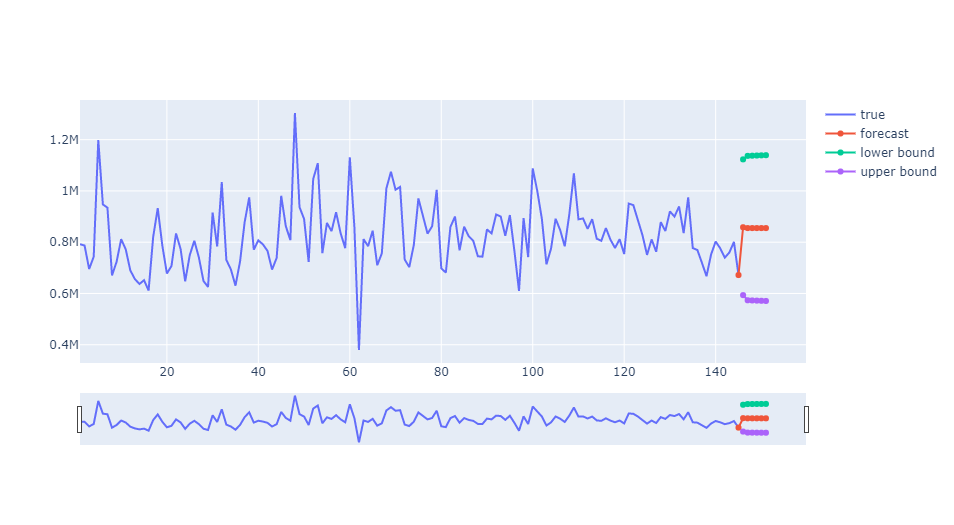

# Contoh aplikasi pada forecast category beverages

In [115]:
cat = pd.DataFrame(df.groupby(['week','category'])['num_orders'].sum().reset_index())
cat

,week,category,num_orders
0,1,Beverages,322382
1,1,Biryani,8309
2,1,Desert,16095
3,1,Extras,30651
4,1,Other Snacks,34302
...,...,...,...
1955,145,Salad,85582
1956,145,Sandwich,84678
1957,145,Seafood,5503
1958,145,Soup,10225


In [116]:
beverages = cat.loc[cat['category'] == 'Beverages'].reset_index()
beverages.drop(['index'],axis = 1, inplace=True)

In [117]:
auto_arima(beverages['num_orders'], m=12, information_criterion='aicc', trace=True, suppress_warnings=True, random_state=123)

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AICC=3454.697, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AICC=3501.045, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AICC=3451.170, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AICC=3466.464, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AICC=4053.211, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AICC=3450.917, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AICC=3449.897, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AICC=3451.794, Time=0.64 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AICC=3450.971, Time=0.93 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AICC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AICC=3496.674, Time=0.09 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AICC=3450.435, Time=0.17 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AICC=3450.045, Time=0.15 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AICC=3451.971, Time=0.28 sec
 ARIMA(1,

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [118]:
model = ARIMA(beverages['num_orders'], order=(1,0,0)) 
model_fit = model.fit()

In [119]:
forecast_length = 6 #prediksi 6 periode selanjutnya (satuan minggu)
forecast_result = model_fit.forecast(forecast_length)
forecast_result

145    254839.554235
146    265741.446582
147    271759.672288
148    275081.943275
149    276915.953007
150    277928.390496
Name: predicted_mean, dtype: float64

In [120]:
last_week = len(beverages)
week = []
for i in range(1, forecast_length+1):
    week.append(last_week + i)

In [121]:
pred = pd.DataFrame({
    'week': week,
    'category': 'Beverages',
    'num_orders': forecast_result
})

In [122]:
beverages_yhat = beverages[-1:].append(pred)
yhat_conf_int = model_fit.get_forecast(forecast_length).conf_int(alpha=0.05)

In [123]:
beverages_forecast = pd.DataFrame({
    'week': week,
    'forecast': forecast_result,
    'upper': yhat_conf_int['lower num_orders'],
    'lower': yhat_conf_int['upper num_orders']
})
beverages_forecast

,week,forecast,upper,lower
145,146,254839.554235,186589.865992,323089.242478
146,147,265741.446582,187783.015091,343699.878074
147,148,271759.672288,191074.492286,352444.852291
148,149,275081.943275,193583.942074,356579.944477
149,150,276915.953007,195171.857345,358660.048668
150,151,277928.390496,196109.446525,359747.334466


In [124]:
# Visualisasi
fig = go.Figure(go.Scatter(name = 'true',x=beverages['week'], y=beverages['num_orders']))
fig.add_trace(go.Scatter(name = 'forecast',x=beverages_yhat['week'], y=beverages_yhat['num_orders']))
fig.add_trace(go.Scatter(name = 'lower bound',x=beverages_forecast['week'], y=beverages_forecast['lower']))
fig.add_trace(go.Scatter(name = 'upper bound',x=beverages_forecast['week'], y=beverages_forecast['upper']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

plotly image: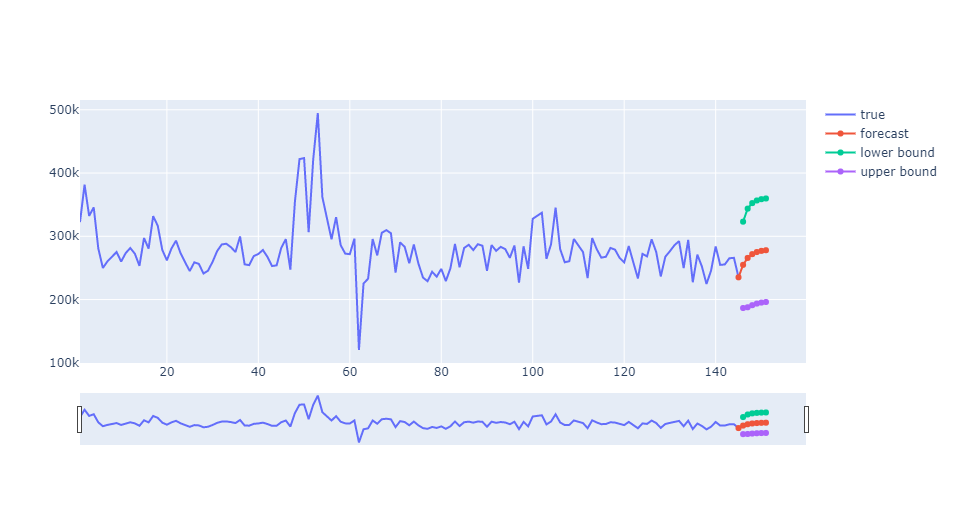

# End Note

* Dari pengamatan data order (total order dan beverages order), terdapat beberapa spike yang bisa diexplore lagi penyebabnya berdasarkan data histori di week tersebut. Contohnya apakah pada waktu tersebut ada promo khusus? Apa kejadian menarik atau trend yang terjadi? Apakah penjualan turun karena adanya shortage bahan baku? dan sebagainya.
* Penggunaan metode ARIMA bisa dimodifikasi sesuai keperluan, contohnya untuk forecast jumlah pesanan untuk category: Beverages, cuisine: Thai, centre_id:55, atau untuk mengetahui kebutuhan meal_id tertentu
* Step by step modelling dapat diefisienkan dengan pembuatan custom functions def  
* Project ini adalah project pertama author menggunakan pmdarima, masih banyak room for improvement dan author sangat terbuka terhadap koreksi, kritik dan saran yang membangun